# **Fake News Classifier**

Dataset: https://www.kaggle.com/c/fake-news/data#

In [12]:
# Import library
import pandas as pd

In [13]:
news = pd.read_csv("train.txt")

news.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
# Get the Independent Features
X = news.drop("label", axis=1)

In [15]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [16]:
#  Get the Dependent features
y = news["label"]

y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [17]:
news.shape

(20800, 5)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [21]:
news = news.dropna()

In [22]:
news.shape

(18285, 5)

In [23]:
news.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [24]:
mess = news.copy ()

In [25]:
mess.reset_index(inplace=True)

In [27]:
mess.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [28]:
mess["title"][8]

'Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda'

In [33]:
# import Libraries
import nltk

# Ensure the punkt resource is downloaded
nltk.download('punkt') # Punkt resource is needed for sentence tokenization, punkt_tab is a specific internal representation
nltk.download('punkt_tab') # Download the resource explicitly

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [34]:
# Download the stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(mess)):
    review = re.sub('[^a-zA-Z]', ' ', mess['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [51]:
corpus[4]

'iranian woman jail fiction unpublish stori woman stone death adulteri'

In [52]:
print(corpus[3])

civilian kill singl us airstrik identifi


In [39]:
# Applying CountVectorizer
## Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))  
X = cv.fit_transform(corpus).toarray()

**max_features=5000:**

- This limits the vocabulary to the top 5000 most frequent words/phrases across your corpus.

- It helps reduce dimensionality and remove less informative words.

**ngram_range=(1, 3):**

- This tells the vectorizer to consider:

    - Unigrams (single words),

    - Bigrams (two-word phrases),

    - Trigrams (three-word phrases).

- Example: "machine learning is fun" will generate:

    - Unigrams: ["machine", "learning", "is", "fun"]

    - Bigrams: ["machine learning", "learning is", "is fun"]

    - Trigrams: ["machine learning is", "learning is fun"]

In [40]:
X.shape

(18285, 5000)

In [42]:
y = mess['label']

In [57]:
# Split the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [58]:
# cv.get_feature_names()[:20]  # See all features name by ngram_range=(1,3) (old code)
cv.get_feature_names_out()[:20]  # first 20 features (words or n-grams) selected by your CountVectorizer

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [59]:
cv.get_params()  # Referring to Bag of words model

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [60]:
count_mess = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [61]:
count_mess.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**MultinomialNB Algorithm**

it works well for text data, and it suppported multiple categories of output

In [96]:
from sklearn.naive_bayes import MultinomialNB 
classifier=MultinomialNB()

In [97]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.893
Confusion matrix, without normalization


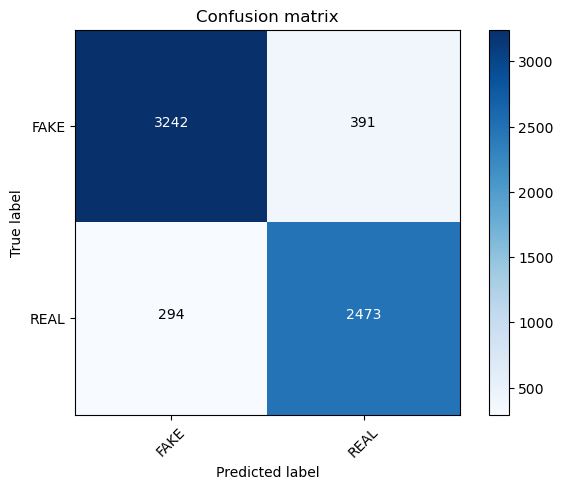

In [98]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
conf_mtrx = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mtrx, classes=['FAKE', 'REAL'])

In [100]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
acc_score

0.89296875

In [69]:
y_train.shape

(11885,)

**Passive Aggressive Classifier Algorithm**

it works well with text data 

In [101]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)  # n_ite (old)

accuracy:   0.913
Confusion matrix, without normalization


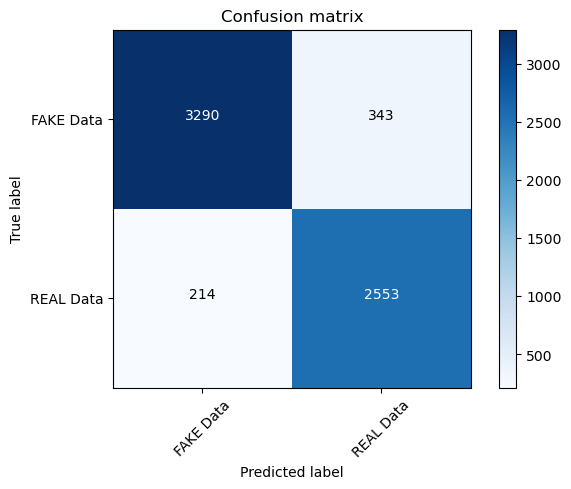

In [102]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**Multinomial Classifier with Hyperparameter**

In [103]:
classifier=MultinomialNB(alpha=0.1)

In [104]:
#  looping over values of alpha from 0 to 0.9. For each alpha, training a new model and checking its accuracy.
#  keep the best performing classifier.
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


Alpha: 0.0, Score : 0.56765625
Alpha: 0.1, Score : 0.891875
Alpha: 0.2, Score : 0.8928125
Alpha: 0.30000000000000004, Score : 0.89484375
Alpha: 0.4, Score : 0.89453125
Alpha: 0.5, Score : 0.8940625
Alpha: 0.6000000000000001, Score : 0.89453125
Alpha: 0.7000000000000001, Score : 0.89359375
Alpha: 0.8, Score : 0.893125
Alpha: 0.9, Score : 0.89359375


In [105]:
# Get feature names from CountVectorizer
feature_names = cv.get_feature_names_out()

In [95]:
classifier.coef_[0]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [110]:
# Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [111]:
# Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

### Why **classifier.coef_** sometimes works with **MultinomialNB**
Normally, **MultinomialNB** from **sklearn.naive_bayes** does not document **coef_** as a public attribute.

However, **coef_** is a hidden alias for **feature_log_prob_** that:

- only exists if your data has 2 classes

- is created for consistency with other scikit-learn classifiers (like LogisticRegression)

- is sometimes removed in future versions, so it might break even if it works now

So when your guide code uses **classifier.coef_**, it works **only because**:

- You're doing binary classification

- You're using a version of scikit-learn that still exposes **coef_** as an alias

### **Official and Safer Alternative**
**Use this (official and stable):**

classifier.feature_log_prob_[0]

**Or to get the feature importance difference between classes:**

classifier.feature_log_prob_[1] - classifier.feature_log_prob_[0]


In [112]:
# Use feature_log_prob_ instead of coef_
classifier.feature_log_prob_[0]

array([ -9.02317072,  -9.38418406, -10.25099474, ...,  -9.95472892,
       -11.42106599,  -9.54075312])

In [113]:
# feature importance difference between classes
classifier.feature_log_prob_[1] - classifier.feature_log_prob_[0]

array([-0.05998542,  0.77865548,  1.1678386 , ..., -0.82302294,
        2.68019606,  0.22933833])

In [114]:
# Use feature_log_prob_ to get real_class_features
real_class_features = classifier.feature_log_prob_[1]

In [115]:
# Use feature_log_prob_ to get fake_class_features
fake_class_features = classifier.feature_log_prob_[0]

In [116]:
# Get most indicative features for REAL news
most_real = sorted(zip(real_class_features, feature_names), reverse=True)[:20]
print("Most Real News Features:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most Real News Features:

trump: -3.9854
hillari: -4.2790
clinton: -4.3718
elect: -4.8706
new: -5.2218
comment: -5.2218
video: -5.3069
war: -5.3696
hillari clinton: -5.3746
us: -5.3999
fbi: -5.4050
email: -5.4580
vote: -5.5197
obama: -5.5550
world: -5.6296
donald: -5.7828
donald trump: -5.8056
russia: -5.8134
america: -5.8369
presid: -5.8449


In [117]:
# Get most indicative features for FAKE news
most_fake = sorted(zip(fake_class_features, feature_names), reverse=True)[:20]
print("\nMost Fake News Features:\n")
for score, word in most_fake:
    print(f"{word}: {score:.4f}")


Most Fake News Features:

new: -2.9392
time: -2.9868
york: -2.9902
new york: -2.9904
york time: -3.0078
new york time: -3.0078
breitbart: -3.9620
trump: -4.0228
donald: -5.3022
donald trump: -5.3071
say: -5.7554
obama: -5.9835
clinton: -6.0692
state: -6.1345
presid: -6.1923
attack: -6.2104
brief: -6.2859
hous: -6.2925
report: -6.2991
hillari: -6.4038


**How to Get the Most Informative Features**

In [118]:
# Get log probabilities for each class
log_probs = classifier.feature_log_prob_

In [119]:
# Top features for 'real' class (assuming real is class 1)
top_real = np.argsort(log_probs[1])[::-1][:20]
print("Top 20 features for REAL news:")
print([feature_names[i] for i in top_real])

Top 20 features for REAL news:
['trump', 'hillari', 'clinton', 'elect', 'comment', 'new', 'video', 'war', 'hillari clinton', 'us', 'fbi', 'email', 'vote', 'obama', 'world', 'donald', 'donald trump', 'russia', 'america', 'presid']


In [120]:
# Top features for 'fake' class (assuming fake is class 0)
top_fake = np.argsort(log_probs[0])[::-1][:20]
print("\nTop 20 features for FAKE news:")
print([feature_names[i] for i in top_fake])


Top 20 features for FAKE news:
['new', 'time', 'york', 'new york', 'new york time', 'york time', 'breitbart', 'trump', 'donald', 'donald trump', 'say', 'obama', 'clinton', 'state', 'presid', 'attack', 'brief', 'hous', 'report', 'hillari']


**View Feature Weights Sorted Together**

In [131]:
# Difference in log probabilities: higher = more real, lower = more fake
feature_diff = log_probs[1] - log_probs[0]
sorted_features = sorted(zip(feature_diff, feature_names))

In [132]:
# Most real
print("\nMost indicative of REAL news:")
print([f for _, f in sorted_features[-20:]])


Most indicative of REAL news:
['fbi reopen', 'hillari campaign', 'leak email', 'world war', 'access pipelin', 'dakota access pipelin', 'chart day', 'halloween', 'hillari email', 'dapl', 'eastern outlook', 'new eastern', 'new eastern outlook', 'ufo', 'us elect', 'dakota access', 'rig elect', 'comment', 'truthfe', 'novemb']


In [138]:
# Get most indicative features for REAL news
most_real = sorted(zip(feature_diff, feature_names), reverse=True)[:20]
print("Most indicative of REAL news:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most indicative of REAL news:

novemb: 4.2721
truthfe: 4.2113
comment: 3.9079
rig elect: 3.8352
dakota access: 3.8352
us elect: 3.7884
ufo: 3.7884
new eastern outlook: 3.7884
new eastern: 3.7884
eastern outlook: 3.7884
dapl: 3.7884
hillari email: 3.7394
halloween: 3.7394
chart day: 3.7394
dakota access pipelin: 3.6878
access pipelin: 3.6878
world war: 3.6544
leak email: 3.6335
hillari campaign: 3.6335
fbi reopen: 3.6335


In [135]:
# Most fake
print("Most indicative of FAKE news:")
print([f for _, f in sorted_features[:20]])

Most indicative of FAKE news:
['breitbart', 'new york time', 'york time', 'new york', 'york', 'brief new', 'brief new york', 'even brief', 'even brief new', 'say new', 'say new york', 'die new', 'die new york', 'trump new york', 'time', 'gorsuch', 'brief', 'california today', 'olymp', 'donald trump new']


In [139]:
# Get most indicative features for REAL news
most_real = sorted(zip(feature_diff, feature_names))[:20]
print("Most indicative of FAKE news:\n")
for score, word in most_real:
    print(f"{word}: {score:.4f}")

Most indicative of FAKE news:

breitbart: -5.6456
new york time: -5.5978
york time: -5.5978
new york: -4.9156
york: -4.8549
brief new: -4.3591
brief new york: -4.3591
even brief: -4.0460
even brief new: -3.9268
say new: -3.9268
say new york: -3.9268
die new: -3.7648
die new york: -3.7648
trump new york: -3.5876
time: -3.2441
gorsuch: -3.0970
brief: -3.0255
california today: -2.9855
olymp: -2.9555
donald trump new: -2.9247


### **Creation of WordCloud**

In [141]:
!pip install wordcloud

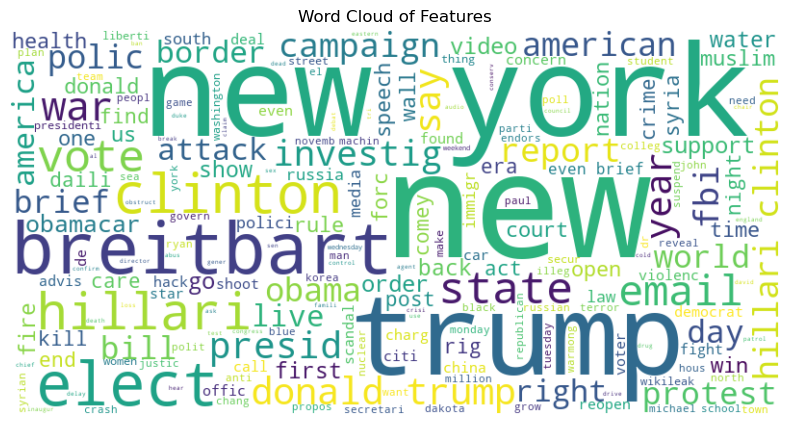

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(feature_names)  # or use only top fake/real features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Features")
plt.show()


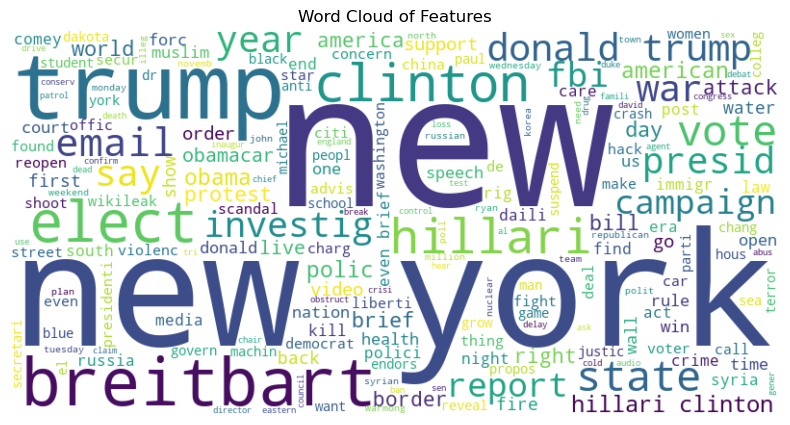

<Figure size 640x480 with 0 Axes>

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(feature_names)  # or use only top fake/real features
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Features")
plt.show()
plt.savefig("Word Cloud of Features using Count Vectorizer")